# Workshop
### Starts with the Likelihood function and hopefully will end-up in pymc3:
#### Probable workflow:
- likelihood
- maximum likelihood
- prior, likelihood and posterior
- conjugate prior
- pymc3

## Resources:


### Read!
- [Statistical advice for A/B testing by Slater Stich](https://blog.insightdatascience.com/statistical-advice-for-a-b-testing-28654a24b9f0#.gddvp63ce): statistical advice for A/B testing by an insight fellow. Focus on using the Beta distribution and hierarchical models.


- [Probabilistic Programming and Bayesian methods for hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers): "An intro to Bayesian methods and probabilistic programming from a computation/understanding-first, mathematics-second point of view." Very good book/jupyter notebooks with a lot of examples.


### Python packages
- [pymc3](http://pymc-devs.github.io/pymc3/index.html): "PyMC3 is a python module for Bayesian statistical modeling and model fitting which focuses on advanced Markov chain Monte Carlo fitting algorithms. Its flexibility and extensibility make it applicable to a large suite of problems." Version "3" of pymc uses Theano. Tutorial has a lot of [examples](http://pymc-devs.github.io/pymc3/examples.html).


- [Stan, PyStan](https://github.com/stan-dev/pystan): Developed by Andrew Gelman. There's an upcoming meetup/webinar: [Oct 25](http://www.meetup.com/bda-group/events/234632881/)


### Learn more
- [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/): Book by Andrew Gelman


- [Andrew Gelman's Blog](http://andrewgelman.com/)


- [Bayesian-Modelling-in-Python](https://github.com/markdregan/Bayesian-Modelling-in-Python). Some more examples and tutorial of pymc3


### Other:


- [Computational Statistics in Python, Duke University](https://people.duke.edu/~ccc14/sta-663/PyMC3.html): Very good resourse, not only for Bayesian stuff.


- [Bayesian Deep Learning](http://twiecki.github.io/blog/2016/07/05/bayesian-deep-learning/): Blog


- [Why We (Usually) Don't Have to Worry About Multiple Comparisons](http://www.stat.columbia.edu/~gelman/research/published/multiple2f.pdf): Gelman et al

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')
font = {'size'   : 15}
plt.rc('font', **font)

from IPython.display import Image

import numpy as np
import scipy.stats as stats

## 1. Likelihood
### binomial distribution
The probability mass function:

$$Pr(X=k|n, p) =  \binom{n}{k}p^k(1-p)^k$$

is a function of k $$f(k; n, p) = \binom{n}{k}p^k(1-p)^k$$

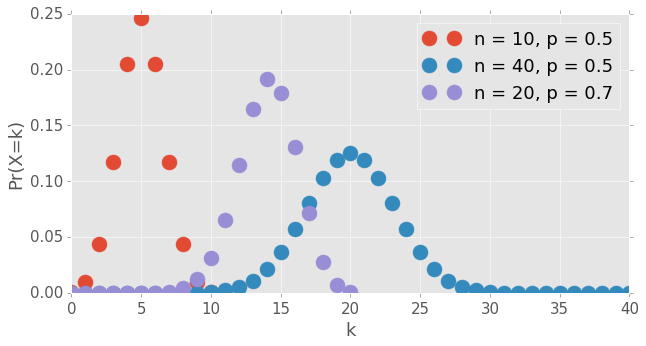

In [2]:
params = [[10, 0.5], [40, 0.5], [20, 0.7]] #[n, p]

plt.figure(figsize=(10,5))

for par in params:
    plt.plot(stats.binom.pmf(range(par[0]+1), n=par[0], p=par[1]), '.', ms=30)

plt.ylabel('Pr(X=k)')
plt.xlabel('k')
plt.legend(['n = %d, p = %0.1f' % (par[0], par[1]) for par in params])  
plt.show()

## likelihood function

is a function of p (the parameter): $$L(p; n, k)=\binom{n}{k}p^k(1-p)^k$$

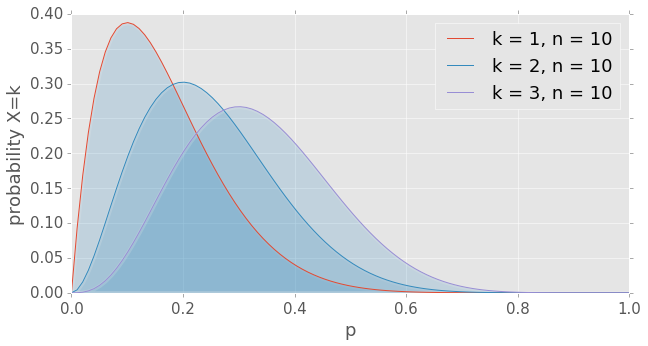

In [3]:
plt.figure(figsize=(10,5))
n = 10
observ = [1, 2, 3]
x = np.linspace(0, 1, 100)
for obs in observ:
    y = [stats.binom.pmf(obs, n=n, p=p) for p in x]
    plt.plot(x, y, '-')
    plt.fill_between(x, 0, y,  lw=4, alpha=0.2)

plt.ylabel('probability X=k')
plt.xlabel('p')
plt.legend(['k = %d, n = %d' % (obs, n) for obs in observ])  
plt.show()

#### what is the maximum likelihood estimate for each of these?

### Is it a probability distribution?

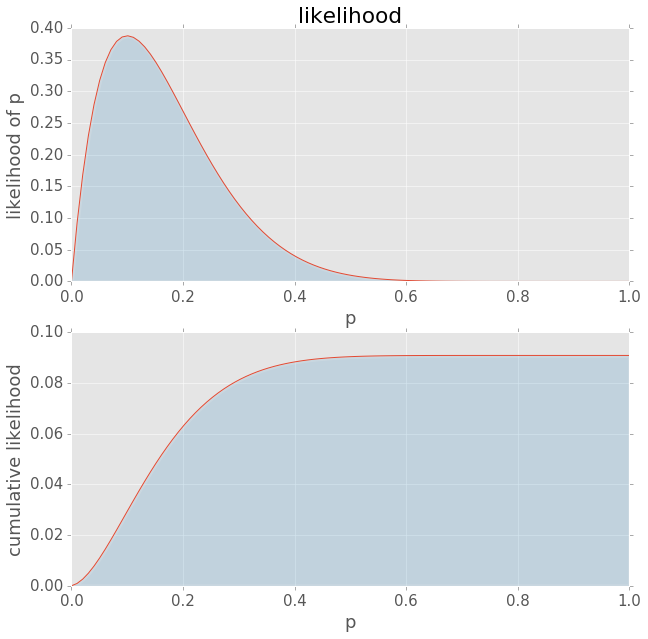

In [4]:
plt.figure(figsize=(10,10))
n = 10
observ = [1]
x = np.linspace(0, 1, 100)

plt.subplot(211)
for obs in observ:
    y = [stats.binom.pmf(obs, n=n, p=p) for p in x]
    plt.plot(x, y, '-')
    plt.fill_between(x, 0, y,  lw=4, alpha=0.2)

plt.ylabel('likelihood of p')
plt.xlabel('p')
plt.title('likelihood')

plt.subplot(212)
plt.plot(x, np.cumsum(y)*np.diff(x)[0], '-')
plt.fill_between(x, 0, np.cumsum(y)*np.diff(x)[0],  lw=4, alpha=0.2)
plt.ylabel('cumulative likelihood')
plt.xlabel('p')
plt.show()

### let's scale it

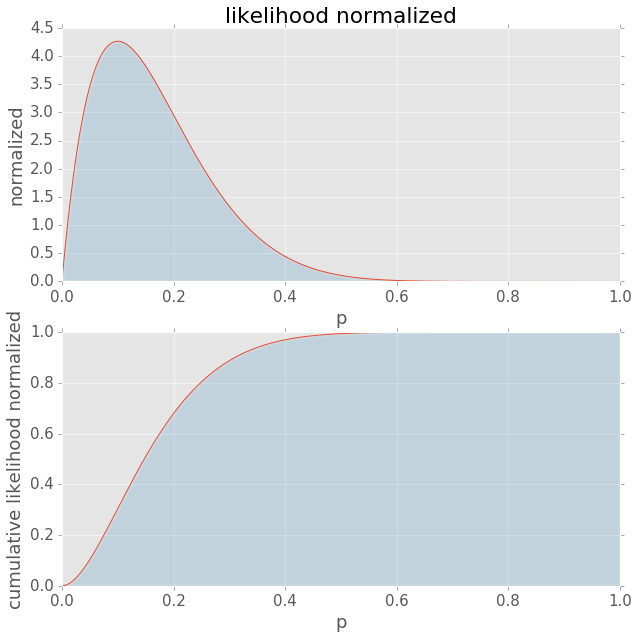

In [5]:
plt.figure(figsize=(10,10))
n = 10
observ = [1]
x = np.linspace(0, 1, 1001)
plt.subplot(211)
for obs in observ:
    y = np.array([stats.binom.pmf(obs, n=n, p=p) for p in x])
    temp = np.cumsum(y)*np.diff(x)[0]
    scale = temp[-1]
    y = y/scale
    plt.plot(x, y, '-')
    plt.fill_between(x, 0, y,  lw=4, alpha=0.2)

plt.ylabel('normalized')
plt.xlabel('p')
plt.title('likelihood normalized')

plt.subplot(212)
plt.plot(x, np.cumsum(y)*np.diff(x)[0], '-')
plt.fill_between(x, 0, np.cumsum(y)*np.diff(x)[0],  lw=4, alpha=0.2)
plt.ylabel('cumulative likelihood normalized')
plt.xlabel('p')
plt.show()

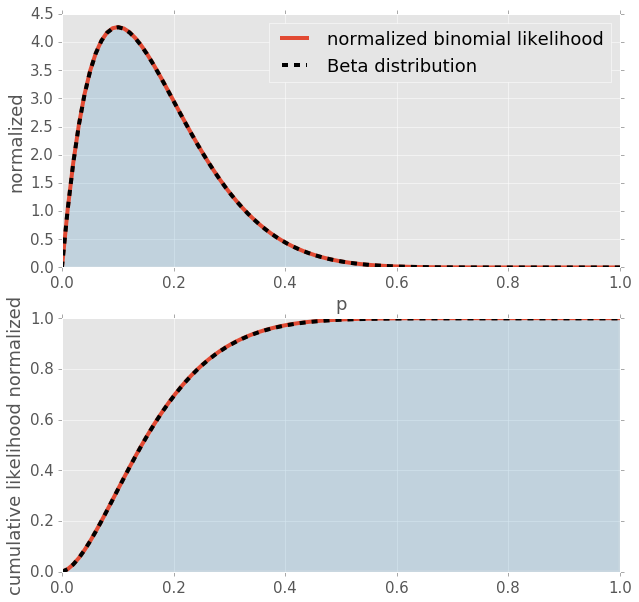

In [6]:
plt.figure(figsize=(10,10))
n = 10
observ = [1]
x = np.linspace(0, 1, 100)
plt.subplot(211)
for obs in observ:
    y = np.array([stats.binom.pmf(obs, n=n, p=p) for p in x])
    temp = np.cumsum(y)*np.diff(x)[0]
    scale = temp[-1]
    y = y/scale
    plt.plot(x, y, '-', lw=4)
    plt.fill_between(x, 0, y,  lw=4, alpha=0.2)
  

distr = stats.beta
a, b = 2., 10.
xb = np.linspace(0., 1., 100)
yb = distr.pdf(xb, a, b)
plt.plot(xb, yb, 'k--', lw=4)


plt.ylabel('normalized')
plt.xlabel('p')
#plt.title('likelihood normalized')
plt.legend(['normalized binomial likelihood', 'Beta distribution'])
#plt.legend(['k = %d, n = %d' % (obs, n) for obs in observ])  
#plt.show()
plt.subplot(212)
plt.plot(x, np.cumsum(y)*np.diff(x)[0], '-', lw=4)
plt.plot(xb, np.cumsum(yb)*np.diff(xb)[0], 'k--', lw=4)
plt.fill_between(x, 0, np.cumsum(y)*np.diff(x)[0],  lw=4, alpha=0.2)
plt.ylabel('cumulative likelihood normalized')
plt.show()

### The Beta distribution
$$P(x|\alpha, \beta) = Beta(\alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha)(\beta)},$$
where $$B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$$
and $$\Gamma$$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), a extension of the factorial.

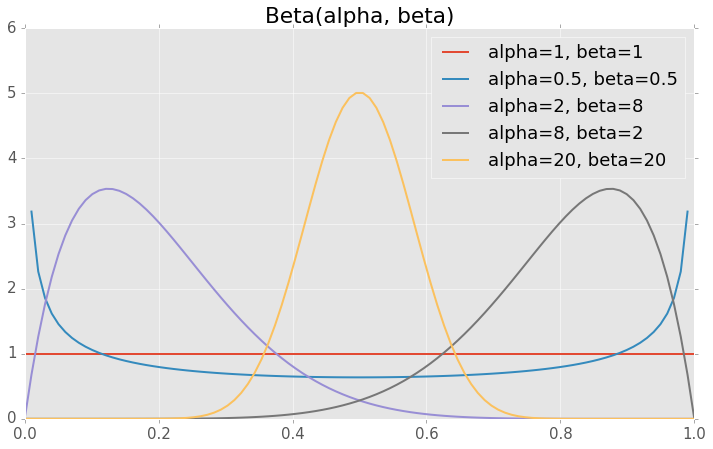

In [7]:
distr = stats.beta
x = np.linspace(0,1,100)
params = [[1,1],[0.5,0.5], [2,8], [8,2], [20,20]]
plt.figure(figsize=(12,7))
for par in params:
    alpha = par[0]
    beta = par[1]
    plt.plot(x, distr.pdf(x, alpha, beta), lw=2)
plt.legend(['alpha=%s, beta=%s' % (str(par[0]), str(par[1])) for par in params], loc=0)
plt.title('Beta(alpha, beta)')
plt.show()

so which Beta did we use?

From the binomial we had $n=10$ and $k=1$, so $$\dots p^1(1-p)^{10-1}= \dots p^{2-1}(1-p)^{10-1}$$
So we used:
$$Beta(x| \alpha=2, \beta=10)$$

#### let's back out a bit...
# 2. Bayes theorem
$$P(\theta|data) = \frac{P(data|\theta)P(\theta)}{P(data)},$$

$P(\theta)$ -> Prior

$P(data|\theta)$ -> Likelihood

$P(\theta|data)$ -> Posterior


$$P(data) = \int P(\theta)P(data|\theta)d\theta$$

We are interested in infering the value of $\theta$. So interested in the Posterior distribution $P(\theta|data)$.



Which prior are we assuming if we consider $Beta(2,10)$ to be the posterior probability of $p$ in our example where we observed k=1 with n=10? 

Answer: Unif(0,1)=Beta(1,1).

See [uninformative priors](https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors).

After some math we can see that if $$P(\theta) = Beta(\alpha, \beta)$$ then $$P(\theta|data) = P(\theta|k;n)=Beta(k+\alpha, n-k+\beta)$$

### Beta is the [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions) of the Binomial distribution

#### What is the conjugate prior of the Guassian?
#### can you guess the conjugate prior of the multinomial?

### Notes:

- Check the blog post on A/B testing and see if it makes more sense now: [Statistical Advice for A/B Testing: Use the Beta Distribution](http://sl8r000.github.io/ab_testing_statistics//use_the_beta_distribution/)

# Intermission sidenote: humans use priors

#### light comes from above:

In [8]:
Image(width=300, url='http://thebrain.mcgill.ca/flash/a/a_02/a_02_p/a_02_p_vis/a_02_p_vis_1h.jpg')

#### "children up to 10 and MIT students" can see dolphins in this vase

In [9]:
Image(width=200, url='http://blog.gg8.se/images/message-of-love-from-the-dolphins/dolphin-vase.jpg')
#Image(width=200, url='http://blog.gg8.se/images/message-of-love-from-the-dolphins/dolphin-vase-outline.jpg')

#### vision is less uncertain than audition
(this is more about how we take uncertainty into account)

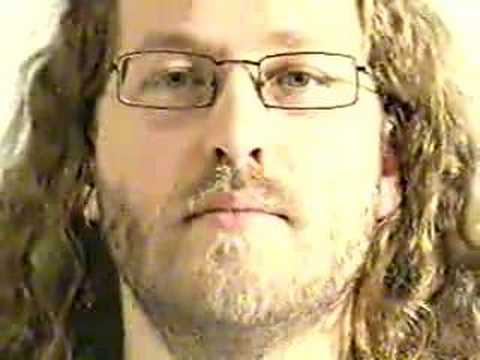

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("aFPtc8BVdJk")#, height=130, width=200)

## Back to Beta and Binomial

## Real life example 

#### Can we throw the phone away. A lot of times the phone in the lab rang and it wasn't for us. Can we throw the phone away please?

### collect data

In [11]:
# code adapted from Probabilistic Programming and Bayesian Methods for Hackers
n_calls = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.35, size=n_calls[-1])

### choose prior

In [12]:
# code adapted from Probabilistic Programming and Bayesian Methods for Hackers
dist = stats.beta
x = np.linspace(0, 1, 100)
prior = [0, 0] # Novick and Halls's prior
prior = [1, 1] # uniform prior
#prior = [1/2., 1/2.] # other non-informative priors: Jeffrey and Reference priors
#prior = [8, 2] # if we are sort of sure the call is going to be for us
#prior = [80, 20] # if we are sort of sure the call is going to be for us

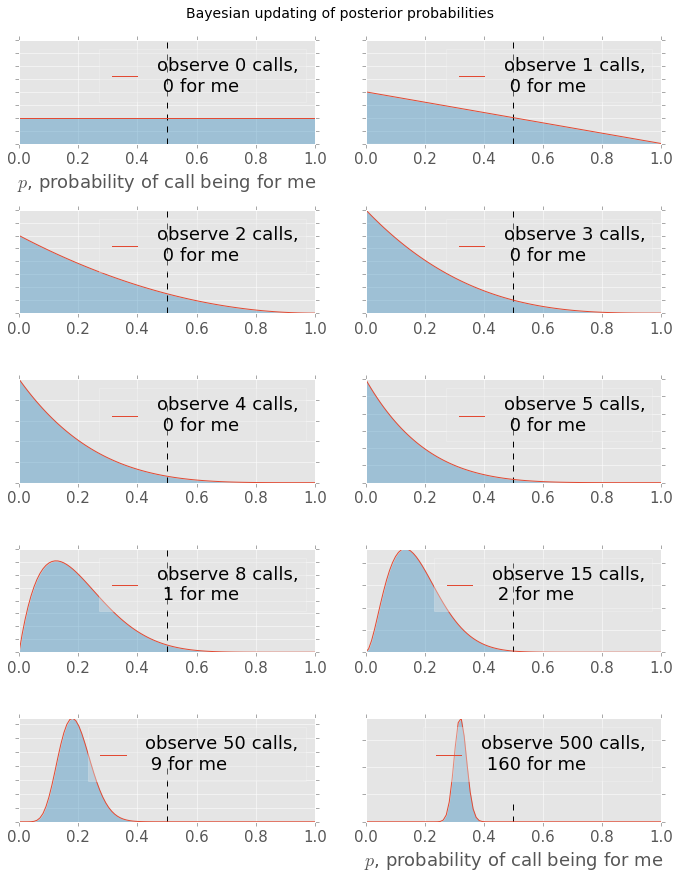

In [13]:
plt.figure(figsize=(10, 12))
for k, N in enumerate(n_calls):
    sx = plt.subplot(len(n_calls) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of call being for me") \
        if k in [0, len(n_calls) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, prior[0] + heads, prior[1] + N - heads)
    plt.plot(x, y, label="observe %d calls,\n %d for me" % (N, heads))
    plt.fill_between(x, 0, y,  alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend(loc=0)
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

## Some notes:
- The conjugate prior of the Normal distribution is... the Normal distribution

- The RMSE comes nicelly from minimizing the negative of loglikelihood function assuming gaussian noise; Try to show it
$$f(\theta|\mu, \sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi}}e^{-\frac{(\theta-\mu)^2}{2\sigma^2}}$$

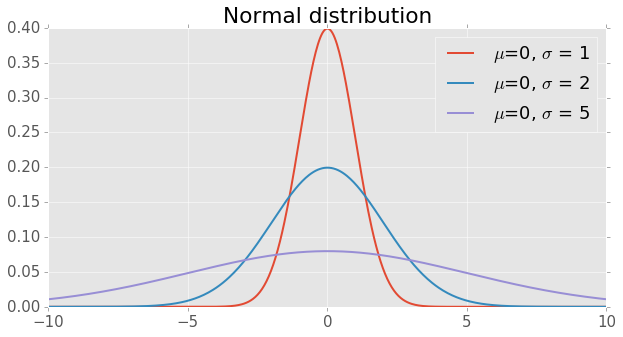

In [14]:
distr = stats.norm
bs = [1, 2, 5]
x = np.linspace(-10,10,500)
plt.figure(figsize=(10,5))
for b in bs:
    plt.plot(x, distr.pdf(x, 0, b), lw=2) #mu, b
plt.legend(['$\mu$=0, $\sigma$ = %d' % b for b in bs])
plt.title('Normal distribution')
plt.show()

- $l_2$ regularization can be intepreted as assuming a gaussian prior over the parameters (do the math)
$$P(\theta;\mu=0, \sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi}}e^{-\frac{(\theta-0)^2}{2\sigma^2}}$$
- $l_1$ regularization can be intepreted as assuming a Laplace prior (aka double exponencial) over the parameters (do the math).
$$P(\theta;\mu=0, b) = \frac{1}{2b}e^{-\frac{|\theta-0|}{b}}$$

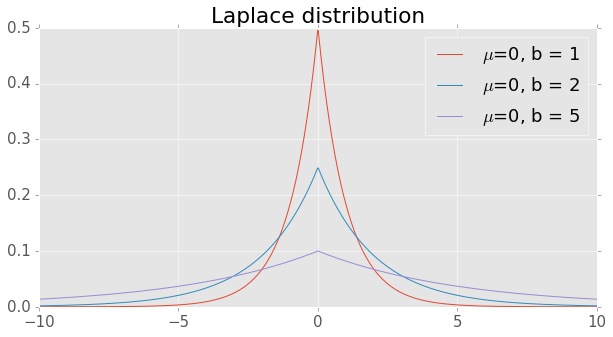

In [15]:
distr = stats.laplace
bs = [1, 2, 5]
x = np.linspace(-10,10,1000)
plt.figure(figsize=(10,5))
for b in bs:
    plt.plot(x, distr.pdf(x, 0, b)) #mu, b
plt.legend(['$\mu$=0, b = %d' % b for b in bs])
plt.title('Laplace distribution')
plt.show()

# 3. pymc3

#### or try [PyStan](https://pystan.readthedocs.io/en/latest/)

#### With a conjugate prior is easy but what if we didn't have a nice conjugate prior?
#### (for instance at goodyear they use the horseshoe distribution (what is that?) and assume that the parameters of the horseshow distribution come from half-cauchy distributions)
#### We can use pymc3 to sample from the posterior distribution

In [16]:
import pymc3 as pm
n = np.size(data)
h = data
prior = [1, 1]
alpha = prior[0]
beta = prior[1]

niter = 3000
with pm.Model() as model:
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=np.sum(data))

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.NUTS()
    
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)

100%|██████████| 3000/3000 [00:01<00:00, 2659.11it/s]


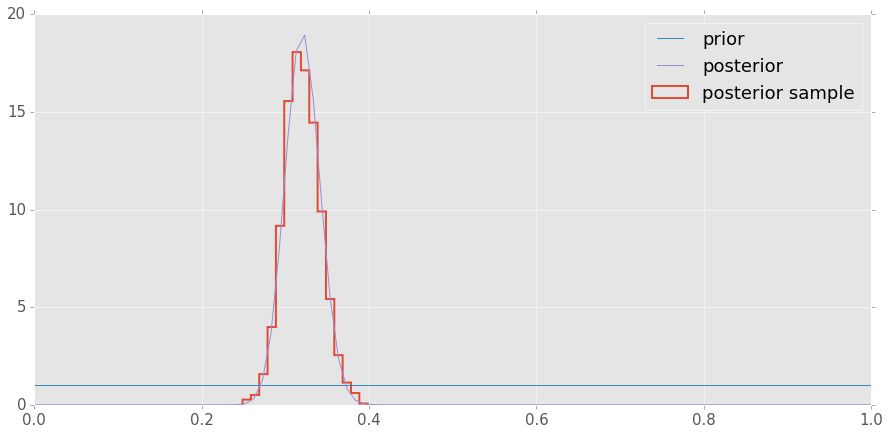

In [17]:
plt.figure(figsize=(15,7))
plt.hist(trace['p'], 15, histtype='step', normed=True, label='posterior sample', lw=2);
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
y = stats.beta.pdf(x, alpha + heads, beta + N - heads)
plt.plot(x, y, label='posterior')#label="observe %d tosses,\n %d heads" % (N, heads))
plt.legend(loc='best');
plt.show()

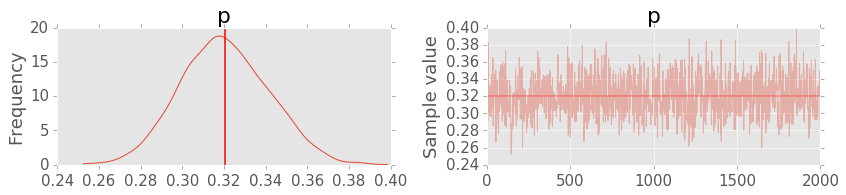

In [18]:
ax = pm.traceplot(trace[-2000:], figsize=(12,len(trace.varnames)*1.5),  
    lines={k: v['mean'] for k, v in pm.df_summary(trace[-2000:]).iterrows()})

Two examples:
- [Example 1: Inferring behaviour from text-message data](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb)

- [Example 2: Cheating among students](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/Ch2_MorePyMC_PyMC3.ipynb)

Now checkout:
- [A/B testing and hierarchical models](http://sl8r000.github.io/ab_testing_statistics/use_a_hierarchical_model/)

### Next session?
#### a little on MCMC, Variational inference, NUTS
#### shrinkage


# Leftovers

### daft to represent hierarchical/graphical models

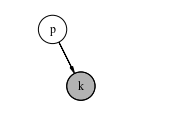

In [19]:
import daft
from matplotlib import rc

ff = "impact"
ff = "times new roman"

rc("font", family=ff, size=12)
rc("text", usetex=False)

pgm = daft.PGM([3.1, 1.8], origin=[2.2, 1.6], aspect=1.)
pgm.add_node(daft.Node("p", r"p", 3.0, 3.0))
pgm.add_node(daft.Node("k", r"k", 3.5, 2.0, observed=True))
pgm.add_edge("p", "k")
pgm.render()
plt.show()

### pymc3 can do truncated distributions

In [20]:
import pymc3 as pm
n = np.size(data)
h = data
prior = [1, 1]
alpha = prior[0]
beta = prior[1]

niter = 3000
with pm.Model() as model:
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)
    BoundedBeta = pm.Bound(pm.Beta, lower=0.45, upper=1)
    p = BoundedBeta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=np.sum(data))

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.NUTS()
    
    
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    
    #v_params = pm.variational.advi(n=niter)
    #trace = pm.variational.sample_vp(v_params, draws=niter)

100%|██████████| 3000/3000 [00:02<00:00, 1418.49it/s]


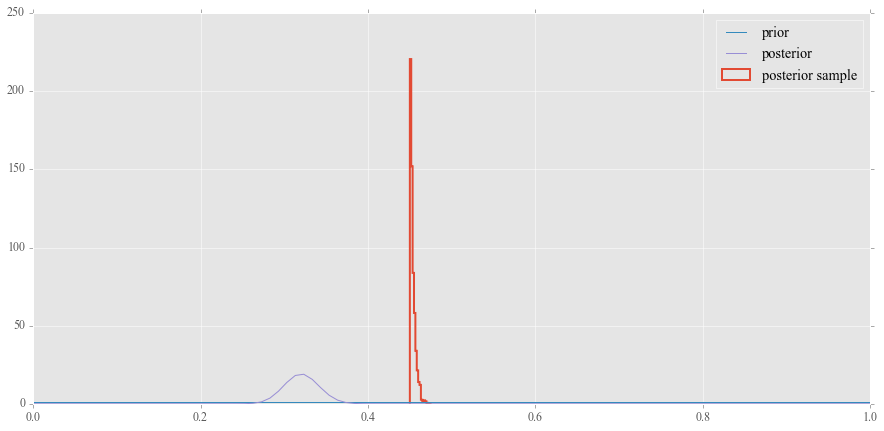

In [21]:
plt.figure(figsize=(15,7))
plt.hist(trace['p'], 15, histtype='step', normed=True, label='posterior sample', lw=2);
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
y = stats.beta.pdf(x, alpha + heads, beta + N - heads)
plt.plot(x, y, label='posterior')#label="observe %d tosses,\n %d heads" % (N, heads))
plt.legend(loc='best');
plt.show()

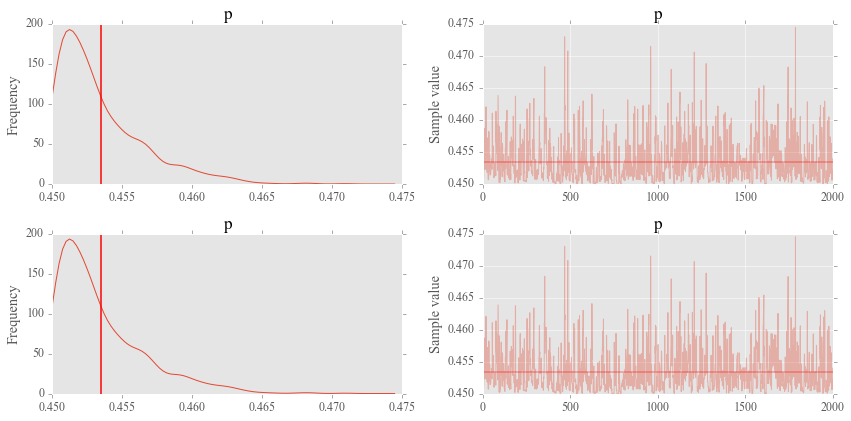

In [22]:
ax = pm.traceplot(trace[-2000:], figsize=(12,len(trace.varnames)*1.5),  
    lines={k: v['mean'] for k, v in pm.df_summary(trace[-2000:]).iterrows()})